# Introduction

## Goal
The goal of this lab is to study two of the most famous discrete discrete optimization benchmark problems - the Traveling Salesman Problem (TSP) and the Knapsack problem.

Discrete optimization problems often present difficulties for naïve Evolutionary Computation approaches, where special care must be taken to generate and maintain feasible solutions and/or to sufficiently penalize infeasible solutions. Here we will see how Ant Colony Optimization can solve this kind of discrete problems much more efficiently than Evolutionary Computation approaches. In addition to that, we will study the effect of parametrization on the performance of Ant Colony Optimization.

Note that, unless otherwise specified, in this module's exercises the aim of the algorithms will be to maximize the fitness function $f(x)$, i.e. higher values correspond to a better fitness!

# Exercise 1

## Traveling Salesman Problem

In the Traveling Salesman Problem (TSP)$^{[1]}$, a salesperson is expected to make a round trip visiting a set of $N$ cities, returning the starting city. The goal is to minimize the total distance traveled. In the simplest version of the TSP, that we consider in this exercise, it is assumed that it is possible to travel from any city $i$ to any city $j$ (i.e., cities form a fully-connected graph), and the distance is the same both ways (this is the so-called symmetric TSP).
To specify a TSP instance, we need the spatial coordinates $(x, y)$ for each of the $N$ cities, and an adjacency matrix $(N × N)$ describing the pairwise distances between cities. These can be computed as Euclidean distances between cities, or in general can be specified according to a given distance function (which may take into account travel cost, time, and other factors). Candidate solutions for the TSP can be easily represented as permutations of the list of city indices (enumerating the order in which cities should be visited). For instance, if there are $5$ cities, then a candidate solution might be $[4, 1, 0, 2, 3]$ (assuming zero-indexing).

In case of Evolutionary Computation approaches, a simple sequence representation can be used, coupled with mechanisms that ensure that the candidate solutions remain feasible during crossover and mutation. This can be accomplished by ad hoc genetic operators (which in the inspyred framework are dubbed as "variators"), namely the partially matched crossover and the inversion mutation, as shown in the next cell. As an alternative, we can use Ant Colony Optimization that is naturally suited for solving graph-like problems such as the TSP and, differently from Evolutionary Computation approaches, does not require any specific operator. To start the experiments run the next cell$^{[2]}$.

The code will perform a single run of Ant Colony Systems (ACS) and a customized Evolutionary Algorithm (EA) and show you the fitness trends of both algorithms, as well as a map corresponding to the best solutions provided by the two algorithms. Note that for both algorithms the fitness function is defined as the reciprocal of the total distance traveled ($f(x) = \frac{1}{\sum{d}}$), to be maximized, such that maximizing $f(x)$ corresponds to minimizing the total distance.

Execute the following cell on different problem instances (this can be obtained by changing the variable "instance" in the next cell) and observe the behavior of the two algorithms on each instance. Note that the run time can be quite long (several seconds)
on larger instances (especially on *att48*). 

- Which algorithm provides the best solution in most cases? 
- What can you say about the number of function evaluations needed to converge?

---
[1]: See https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html

[2]: For all the exercises in this lab you may set the seed for the pseudo-random number generator. This will allow you to reproduce your results.

[3]: Note that you can also create your own instances by editing the two variables "points" (that contains a set of coordinates
$(x, y)$) and "distances" (that contains an adjacency matrix that can be computed e.g. by Euclidean distances between points).

Points:
 [[6734.0, 1453.0], [2233.0, 10.0], [5530.0, 1424.0], [401.0, 841.0], [3082.0, 1644.0], [7608.0, 4458.0], [7573.0, 3716.0], [7265.0, 1268.0], [6898.0, 1885.0], [1112.0, 2049.0], [5468.0, 2606.0], [5989.0, 2873.0], [4706.0, 2674.0], [4612.0, 2035.0], [6347.0, 2683.0], [6107.0, 669.0], [7611.0, 5184.0], [7462.0, 3590.0], [7732.0, 4723.0], [5900.0, 3561.0], [4483.0, 3369.0], [6101.0, 1110.0], [5199.0, 2182.0], [1633.0, 2809.0], [4307.0, 2322.0], [675.0, 1006.0], [7555.0, 4819.0], [7541.0, 3981.0], [3177.0, 756.0], [7352.0, 4506.0], [7545.0, 2801.0], [3245.0, 3305.0], [6426.0, 3173.0], [4608.0, 1198.0], [23.0, 2216.0], [7248.0, 3779.0], [7762.0, 4595.0], [7392.0, 2244.0], [3484.0, 2829.0], [6271.0, 2135.0], [4985.0, 140.0], [1916.0, 1569.0], [7280.0, 4899.0], [7509.0, 3239.0], [10.0, 2676.0], [6807.0, 2993.0], [5185.0, 3258.0], [3023.0, 1942.0]]
Distances:
 [[0.0, 4727.0, 1205.0, 6363.0, 3657.0, 3130.0, 2414.0, 563.0, 463.0, 5654.0, 1713.0, 1604.0, 2368.0, 2201.0, 1290.0, 1004.0, 3

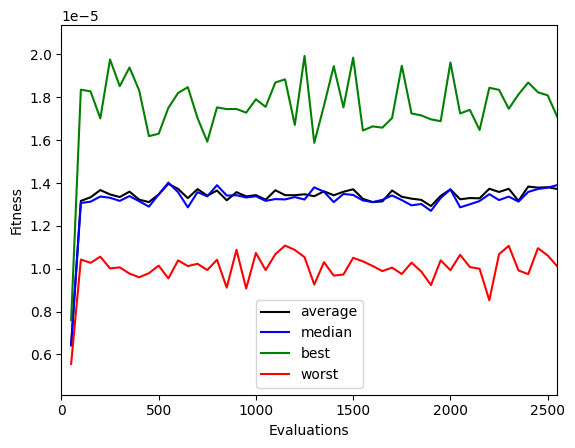

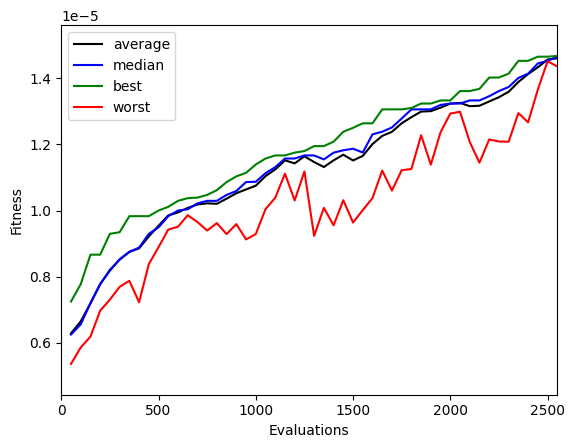

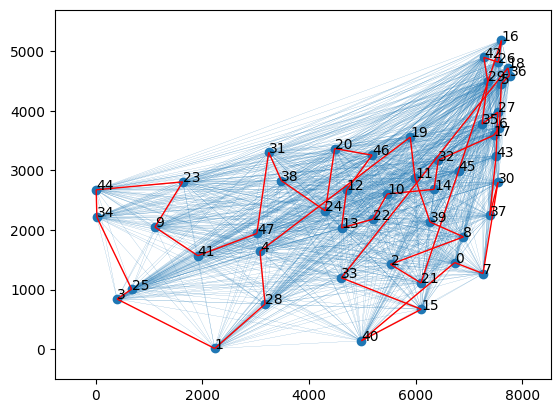

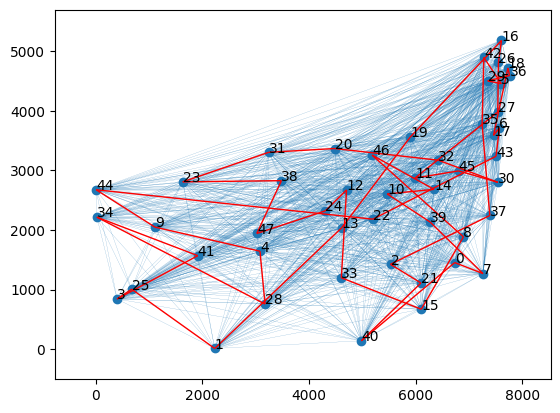

In [5]:
from utils.utils_07.exercise_1 import *
from utils.utils_07.plot_utils import *
"""
points = [(110.0, 225.0), (161.0, 280.0), (325.0, 554.0), (490.0, 285.0),
          (157.0, 443.0), (283.0, 379.0), (397.0, 566.0), (306.0, 360.0), 
          (343.0, 110.0), (552.0, 199.0)]
distances = [[0 for _ in range(len(points))] for _ in range(len(points))]
for i, p in enumerate(points):
    for j, q in enumerate(points):
        distances[i][j] = math.sqrt((p[0] - q[0])**2 + (p[1] - q[1])**2)
"""

"""
datasets taken from:
    https://people.sc.fsu.edu/~jburkardt/datasets/tsp/tsp.html
    http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/
"""
# instance = "p01"
# instance = "bays29"
instance = "att48"
points = readFileAsMatrix("utils/utils_07/datasets/tsp/" + instance + "_xy.txt")
distances = readFileAsMatrix("utils/utils_07/datasets/tsp/" + instance + "_d.txt")

print("Points:\n", points)
print("Distances:\n", distances)

# common parameters
pop_size = 50
max_generations = 50
seed = 0
prng = Random(seed)
display = True
# ACS specific parameters
evaporation_rate = 0.1
learning_rate = 0.1
# EA specific parameters
tournament_size = 5
num_elites = 1

args = {}
args["fig_title"] = "ACS"

# run ACS
problem = inspyred.benchmarks.TSP(distances)
ac = inspyred.swarm.ACS(prng, problem.components)
ac.observer = [plot_observer]
ac.terminator = inspyred.ec.terminators.generation_termination
final_pop = ac.evolve(generator=problem.constructor, 
                      evaluator=problem.evaluator, 
                      bounder=problem.bounder,
                      maximize=problem.maximize, 
                      pop_size=pop_size,
                      max_generations=max_generations,
                      evaporation_rate=evaporation_rate,
                      learning_rate=learning_rate,**args)
best_ACS = max(ac.archive)

args["fig_title"] = "EA"

# run EA
problem = inspyred.benchmarks.TSP(distances)
ea = inspyred.ec.EvolutionaryComputation(prng)
ea.observer = [plot_observer]
ea.selector = inspyred.ec.selectors.tournament_selection
ea.variator = [inspyred.ec.variators.partially_matched_crossover,
               inspyred.ec.variators.inversion_mutation]
ea.replacer = inspyred.ec.replacers.generational_replacement
ea.terminator = inspyred.ec.terminators.generation_termination
final_pop = ea.evolve(generator=problem.generator,
                      evaluator=problem.evaluator,
                      bounder=problem.bounder,
                      maximize=problem.maximize,
                      pop_size=pop_size,
                      max_generations=max_generations,
                      num_selected=pop_size,
                      tournament_size=tournament_size,
                      num_elites=num_elites,**args)
best_EA = max(ea.population)

if display:
    indices = []
    for link in best_ACS.candidate:
        # each point is ((i, j), 1/distance_ij)
        indices.append(link.element[0])
    indices.append(best_ACS.candidate[-1].element[1])
    solution_ACS = indices

    solution_EA = best_EA.candidate

    print("Best Solution ACS: {0} - Distance: {1}".format(str(solution_ACS), 1/best_ACS.fitness))
    print("Best Solution EA : {0} - Distance: {1}".format(str(solution_EA), 1/best_EA.fitness))

    plotSolution(points, distances, solution_ACS, "ACS (best solution)")
    plotSolution(points, distances, solution_EA, "EA (best solution)")

    ioff()
    show()

# Exercise 2
## Knapsack problem 
In the Knapsack problem$^{[1]}$, we are given a knapsack of fixed capacity $C$. We are also given a list of $N$ items, each having a weight $w$ and a value $v$. We can put any subset of the items into the knapsack, as long as the total weight of the selected items does not exceed $C$. In the most general formulation of the problem, it is possible to select the same item multiple times. We aim to maximize the total value of the selection, which is the sum of the values of each item we put into the knapsack. Thus, a solution of the Knapsack problem is a subset $S$ of the $N$ items, each considered a certain number of times, for which the total weight is less than or equal to $C$, and which maximizes the total value. If the same item can be selected multiple times, the problem is called *Knapsack with duplicates*, otherwise if any item can be selected only once, the problem is called *0/1 Knapsack*.

Candidate solutions for the Knapsack problem can be represented as either a binary list (for the *0/1 Knapsack*) or as a list of non-negative integers (for the Knapsack with duplicates). In each case, the length of the list is the same as the number of items, and each element of the list corresponds to the quantity of the corresponding item to place in the knapsack. In case of Evolutionary Computation approaches, we can use as genetic operators uniform crossover and Gaussian mutation, as shown in the next cell. The reason we can use Gaussian mutation, even though the candidates are composed of discrete values, is because the bounder created by the Knapsack benchmark is an instance of $DiscreteBounder$, which automatically moves an illegal component to its nearest legal value (an integer, in this case). Once again, as an alternative we can use Ant Colony Optimization.
In this exercise, we will focus on the *0/1 Knapsack problem* (this is obtained by setting duplicates=False in next cell). To start the experiments, you need to run the next cell. The script will perform a single run of Ant Colony Systems (ACS) and a customized Evolutionary Algorithm (EA) and show you the fitness trends of both algorithms.

Execute the script on different problem instances (this can be obtained by changing the variable "instance" in the next cell) and observe the behavior of the two algorithms on each instance$^{[2]}$. Note that the run time can be quite long (several seconds) on larger instances. 

- Which algorithm provides the best solution in most cases?
- What can you say about the number of function evaluations needed to converge?

---
[1]: See https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html

[2]: Note that you can also create your own instances by editing the two variables "items" (a set of pairs $<w, v>$)
and "capacity". Both variables must be expressed as integer values.


Best Solution ACS: [0, 1, 0, 1, 0, 0, 1] - Value: 1735
Best Solution EA : [0, 1, 0, 1, 0, 0, 1] - Value: 1735


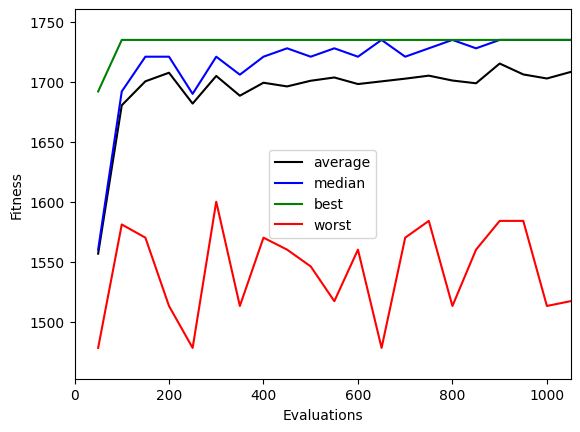

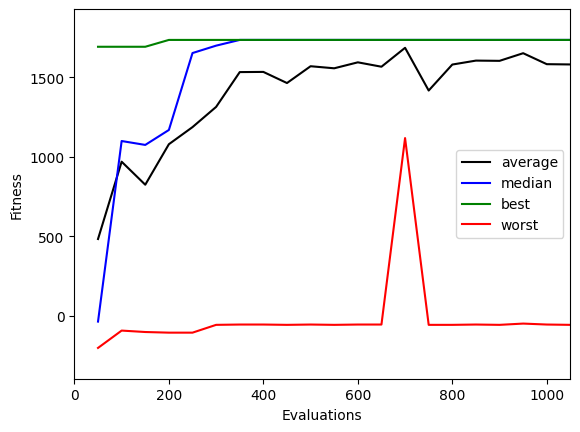

In [13]:
from utils.utils_07.exercise_2 import *
from utils.utils_07.plot_utils import *

"""
items = [(7,369), (10,346), (11,322), (10,347), (12,348), (13,383),
         (8,347), (11,364), (8,340), (8,324), (13,365), (12,314), 
         (13,306), (13,394), (7,326), (11,310), (9,400), (13,339), 
         (5,381), (14,353), (6,383), (9,317), (6,349), (11,396), 
         (14,353), (9,322), (5,329), (5,386), (5,382), (4,369), 
         (6,304), (10,392), (8,390), (8,307), (10,318), (13,359), 
         (9,378), (8,376), (11,330), (9,331)]
capacity = 15
"""

# datasets taken from https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html
# instance =  "01"
#instance = "02"
#instance = "03"
#instance = "04"
#instance = "05"
instance = "06"
# instance = "07"
# instance = "08"

instances = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
]

# for instance in instances:
#     print(instance)
capacity = readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_c.txt")[0]
weights =  readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_w.txt")
values =  readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_p.txt")
items = [(w,v) for w, v in zip(weights, values)]

# print("Items:\n", items)
# print("Capacity:\n", capacity)

# common parameters
pop_size = 50
max_generations = 20
duplicates = False
seed = 0
prng = Random(seed)
display = True
# ACS specific parameters
evaporation_rate = 0.1
learning_rate = 0.1
# EA specific parameters
tournament_size = 5
num_elites = 1

args = {}
args["fig_title"] = "ACS"

# run ACS
problem = inspyred.benchmarks.Knapsack(capacity, items, duplicates=duplicates)
ac = inspyred.swarm.ACS(prng, problem.components)
ac.observer = [plot_observer]
ac.terminator = inspyred.ec.terminators.generation_termination
final_pop = ac.evolve(generator=problem.constructor,
                    evaluator=problem.evaluator,
                    bounder=problem.bounder,
                    maximize=problem.maximize,
                    pop_size=pop_size,
                    max_generations=max_generations,
                    evaporation_rate=evaporation_rate,
                    learning_rate=learning_rate,**args)
best_ACS = max(ac.archive)

args["fig_title"] = "EA"

# run EA
problem = inspyred.benchmarks.Knapsack(capacity, items, duplicates=duplicates)
ea = inspyred.ec.EvolutionaryComputation(prng)
ea.observer = [plot_observer]
ea.selector = inspyred.ec.selectors.tournament_selection
ea.variator = [inspyred.ec.variators.uniform_crossover,
            inspyred.ec.variators.gaussian_mutation]
ea.replacer = inspyred.ec.replacers.generational_replacement
ea.terminator = inspyred.ec.terminators.generation_termination
final_pop = ea.evolve(generator=problem.generator,
                    evaluator=problem.evaluator,
                    bounder=problem.bounder,
                    maximize=problem.maximize,
                    pop_size=pop_size,
                    max_generations=max_generations,
                    num_selected=pop_size,
                    tournament_size=tournament_size,
                    num_elites=num_elites,**args)
best_EA = max(ea.population)

if display:
    indices = []
    for item in best_ACS.candidate:
        # each item is (element, value)
        index = items.index((item.element, item.value))
        indices.append(index)
    solution_ACS = np.zeros(len(items),dtype=np.uint16)
    for i in indices:
        solution_ACS[i] += 1
    solution_ACS = solution_ACS.tolist()

    solution_EA = best_EA.candidate

    print("Best Solution ACS: {0} - Value: {1}".format(str(solution_ACS), best_ACS.fitness))
    print("Best Solution EA : {0} - Value: {1}".format(str(solution_EA), best_EA.fitness))

    ioff()
    show()

# Exercise 3

In this exercise we will focus on the *Knapsack with duplicates* (this is obtained by setting duplicates=True in the next cell). To start the experiments, you need to run the next cell. Once again, the script will perform a single run of Ant Colony Systems (ACS) and a customized Evolutionary Algorithm (EA) and show you the fitness trends of both algorithms.

Execute the script on different problem instances (this can be obtained by changing the variable "instance" in the next cell) and observe the behavior of the two algorithms on each instance$^{[1]}$. Note that the run time can be quite long (several seconds) on larger instances.

- Which algorithm provides the best solution in most cases?
- What can you say about the number of function evaluations needed to converge? 
- Do you observe any difference on the algorithmic behavior between this exercise and the previous one?

---
[1]: Also in this case you can also create your own instances by editing the two variables "items" and "capacity".

01
Items:
 [(23, 92), (31, 57), (29, 49), (44, 68), (53, 60), (38, 43), (63, 67), (85, 84), (89, 87), (82, 72)]
Capacity:
 165
Best Solution ACS: [7, 0, 0, 0, 0, 0, 0, 0, 0, 0] - Value: 644
Best Solution EA : [4, 0, 2, 0, 0, 0, 0, 0, 0, 0] - Value: 466


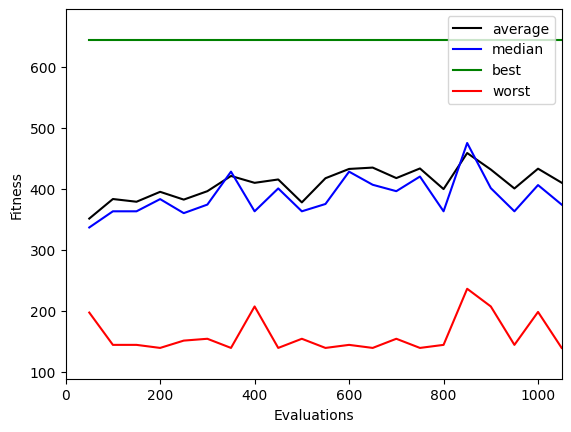

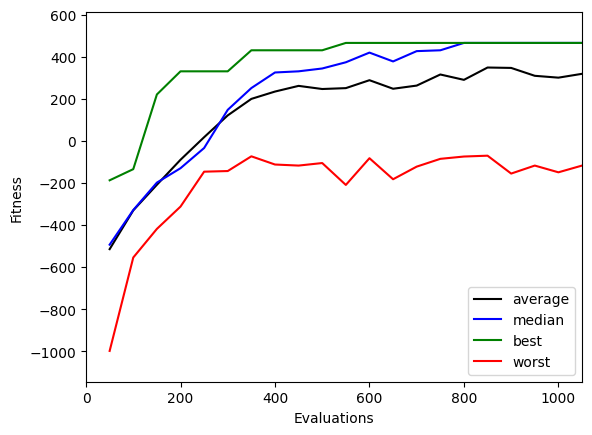

02
Items:
 [(12, 24), (7, 13), (11, 23), (8, 15), (9, 16)]
Capacity:
 26
Best Solution ACS: [0, 1, 1, 1, 0] - Value: 51
Best Solution EA : [1, 2, 0, 0, 0] - Value: 50


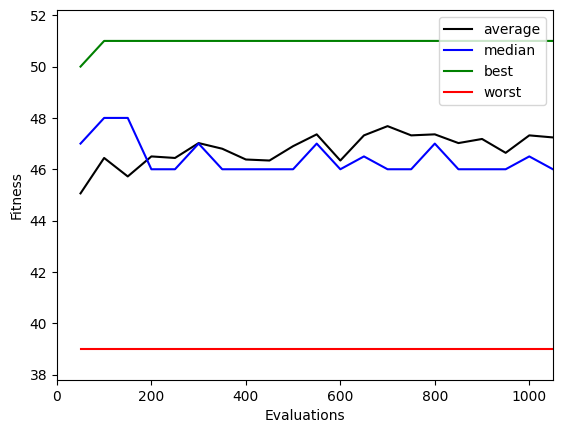

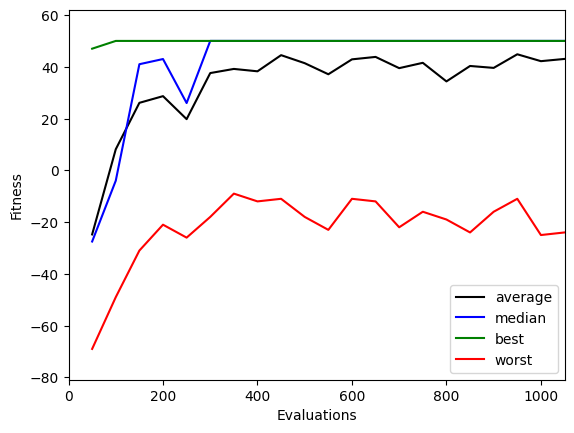

03
Items:
 [(56, 50), (59, 50), (80, 64), (64, 46), (75, 50), (17, 5)]
Capacity:
 190
Best Solution ACS: [2, 1, 0, 0, 0, 1] - Value: 155
Best Solution EA : [0, 1, 1, 0, 0, 3] - Value: 129


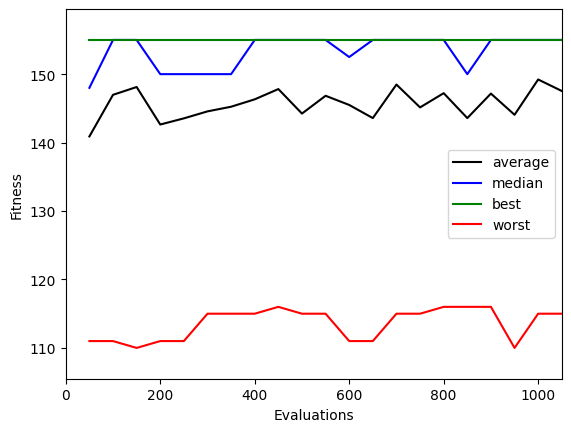

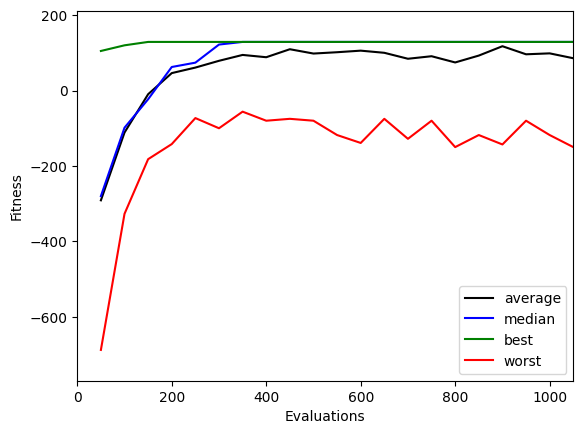

04
Items:
 [(31, 70), (10, 20), (20, 39), (19, 37), (4, 7), (3, 5), (6, 10)]
Capacity:
 50
Best Solution ACS: [1, 0, 0, 1, 0, 0, 0] - Value: 107
Best Solution EA : [0, 4, 0, 0, 1, 0, 1] - Value: 97


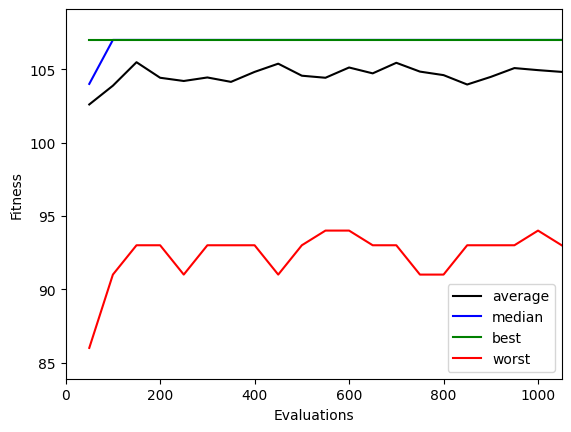

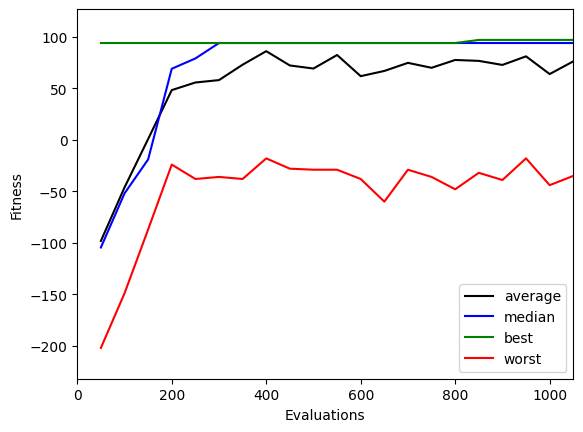

05
Items:
 [(25, 350), (35, 400), (45, 450), (5, 20), (25, 70), (3, 8), (2, 5), (2, 5)]
Capacity:
 104
Best Solution ACS: [4, 0, 0, 0, 0, 0, 2, 0] - Value: 1410
Best Solution EA : [1, 0, 0, 3, 1, 11, 1, 2] - Value: 583


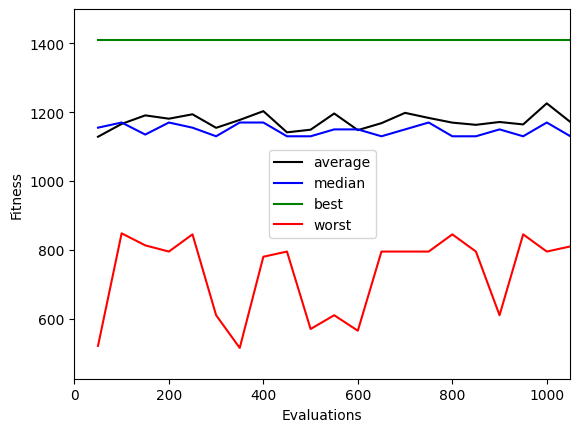

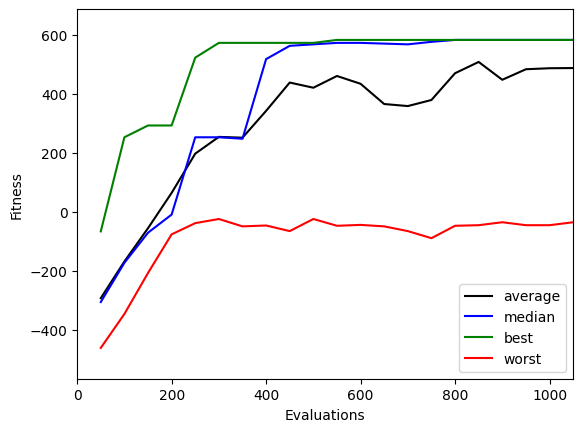

06
Items:
 [(41, 442), (50, 525), (49, 511), (59, 593), (55, 546), (57, 564), (60, 617)]
Capacity:
 170
Best Solution ACS: [4, 0, 0, 0, 0, 0, 0] - Value: 1768
Best Solution EA : [0, 1, 0, 0, 0, 0, 2] - Value: 1759


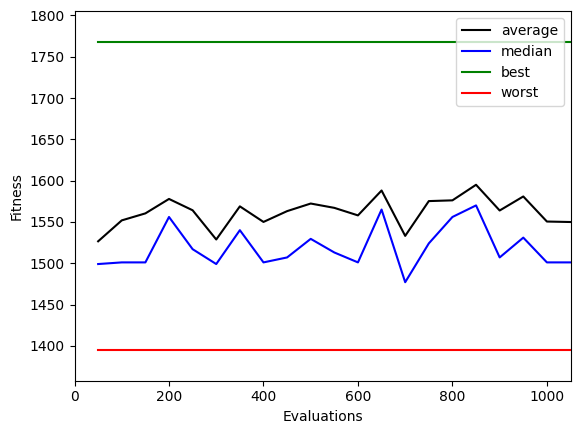

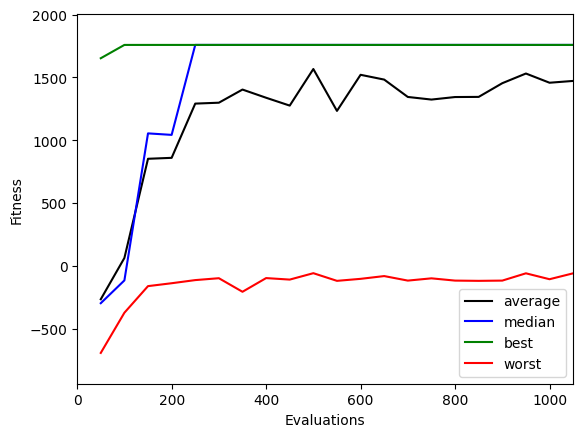

07
Items:
 [(70, 135), (73, 139), (77, 149), (80, 150), (82, 156), (87, 163), (90, 173), (94, 184), (98, 192), (106, 201), (110, 210), (113, 214), (115, 221), (118, 229), (120, 240)]
Capacity:
 750
Best Solution ACS: [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5] - Value: 1488
Best Solution EA : [1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0] - Value: 1441


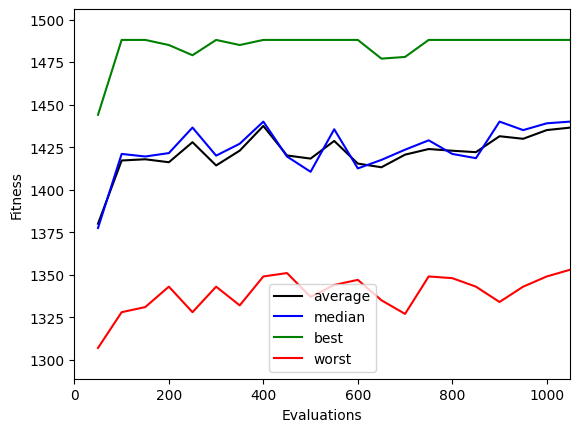

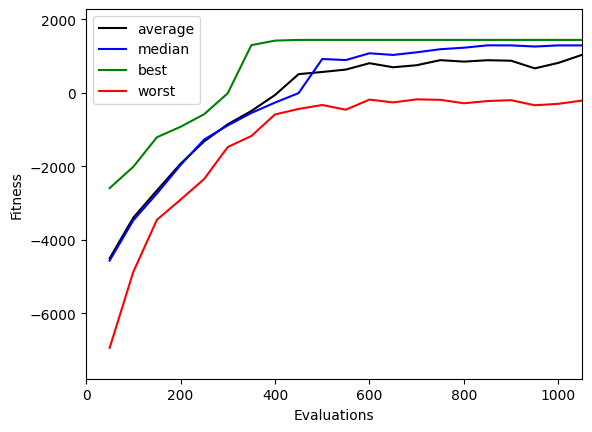

08
Items:
 [(382745, 825594), (799601, 1677009), (909247, 1676628), (729069, 1523970), (467902, 943972), (44328, 97426), (34610, 69666), (698150, 1296457), (823460, 1679693), (903959, 1902996), (853665, 1844992), (551830, 1049289), (610856, 1252836), (670702, 1319836), (488960, 953277), (951111, 2067538), (323046, 675367), (446298, 853655), (931161, 1826027), (31385, 65731), (496951, 901489), (264724, 577243), (224916, 466257), (169684, 369261)]
Capacity:
 6404180
Best Solution ACS: [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 3, 0, 0, 0, 3] - Value: 13905056
Best Solution EA : [0, 0, 0, 0, 0, 20, 60, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 7, 0, 2, 10, 3] - Value: -737037


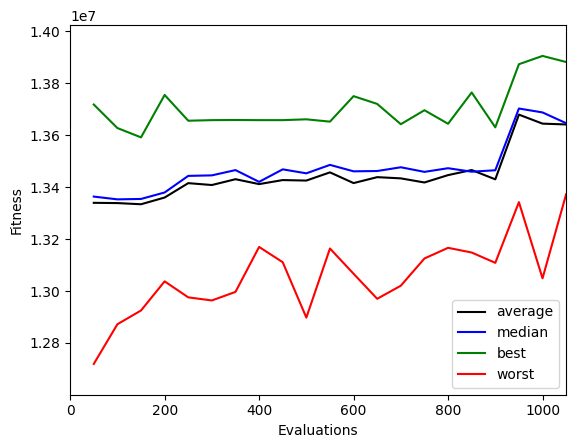

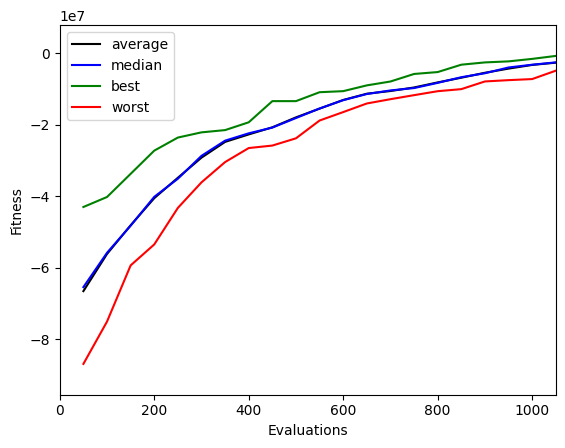

In [14]:
from utils.utils_07.exercise_3 import *
from utils.utils_07.plot_utils import *

"""
items = [(7,369), (10,346), (11,322), (10,347), (12,348), (13,383),
         (8,347), (11,364), (8,340), (8,324), (13,365), (12,314), 
         (13,306), (13,394), (7,326), (11,310), (9,400), (13,339), 
         (5,381), (14,353), (6,383), (9,317), (6,349), (11,396), 
         (14,353), (9,322), (5,329), (5,386), (5,382), (4,369), 
         (6,304), (10,392), (8,390), (8,307), (10,318), (13,359), 
         (9,378), (8,376), (11,330), (9,331)]
capacity = 15
"""

# datasets taken from https://people.sc.fsu.edu/~jburkardt/datasets/knapsack_01/knapsack_01.html
instance = "01"
#instance = "02"
#instance = "03"
#instance = "04"
#instance = "05"
#instance = "06"
#instance = "07"
#instance = "08"

instances = [
    "01",
    "02",
    "03",
    "04",
    "05",
    "06",
    "07",
    "08",
]

for instance in instances:
    print(instance)
    capacity = readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_c.txt")[0]
    weights =  readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_w.txt")
    values =  readFileAsList("utils/utils_07/datasets/knapsack_01/p" + instance + "_p.txt")
    items = [(w,v) for w, v in zip(weights, values)]

    print("Items:\n", items)
    print("Capacity:\n", capacity)

    # common parameters
    pop_size = 50
    max_generations = 20
    duplicates = True
    seed = 0
    prng = Random(seed)
    display = True
    # ACS specific parameters
    evaporation_rate = 0.1
    learning_rate = 0.1
    # EA specific parameters
    tournament_size = 5
    num_elites = 1

    args = {}
    args["fig_title"] = "ACS"

    # run ACS
    problem = inspyred.benchmarks.Knapsack(capacity, items, duplicates=duplicates)
    ac = inspyred.swarm.ACS(prng, problem.components)
    ac.observer = [plot_observer]
    ac.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ac.evolve(generator=problem.constructor,
                        evaluator=problem.evaluator,
                        bounder=problem.bounder,
                        maximize=problem.maximize,
                        pop_size=pop_size,
                        max_generations=max_generations,
                        evaporation_rate=evaporation_rate,
                        learning_rate=learning_rate,**args)
    best_ACS = max(ac.archive)

    args["fig_title"] = "EA"

    # run EA
    problem = inspyred.benchmarks.Knapsack(capacity, items, duplicates=duplicates)
    ea = inspyred.ec.EvolutionaryComputation(prng)
    ea.observer = [plot_observer]
    ea.selector = inspyred.ec.selectors.tournament_selection
    ea.variator = [inspyred.ec.variators.uniform_crossover,
                inspyred.ec.variators.gaussian_mutation]
    ea.replacer = inspyred.ec.replacers.generational_replacement
    ea.terminator = inspyred.ec.terminators.generation_termination
    final_pop = ea.evolve(generator=problem.generator,
                        evaluator=problem.evaluator,
                        bounder=problem.bounder,
                        maximize=problem.maximize,
                        pop_size=pop_size,
                        max_generations=max_generations,
                        num_selected=pop_size,
                        tournament_size=tournament_size,
                        num_elites=num_elites,**args)
    best_EA = max(ea.population)

    if display:
        indices = []
        for item in best_ACS.candidate:
            # each item is (element, value)
            index = items.index((item.element, item.value))
            indices.append(index)
        solution_ACS = np.zeros(len(items),dtype=np.uint16)
        for i in indices:
            solution_ACS[i] += 1
        solution_ACS = solution_ACS.tolist()

        solution_EA = best_EA.candidate

        print("Best Solution ACS: {0} - Value: {1}".format(str(solution_ACS), best_ACS.fitness))
        print("Best Solution EA : {0} - Value: {1}".format(str(solution_EA), best_EA.fitness))

        ioff()
        show()

## Instruction and questions
Concisely note down your observations from the previous exercises (follow the bullet points) and think about the following questions. 
- What are the main differences between continuous and discrete optimization problems? Do you think that any of these two classes of problems is more difficult than the other?
- Why is ACS particularly suited for discrete optimization?
- Consider the two versions of the Knapsack problem (0/1, and with duplicates). Which of the two problems is more challenging from an optimization point of view? Why?